# Statistic For Data Analyst(3)

## Analisis Seri Waktu: Tren, Musiman, dan Siklik

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Sintesa Data
np.random.seed(42) # ketika di running ulang agar datanya tetap sama walau dirandom

n=200
t=np.linspace(0,10,n)
trend = 0.5 *t
seasonality = np.sin(2 * np.pi * t)
cyclical = 0.1 * np.sin(2*np.pi*t /5)
noise = 0.2 * np.random.normal(size=n)
data = trend + seasonality + noise + cyclical

# Membuar dataframe
df = pd.DataFrame(data,columns=['Sales'])
df.index = pd.date_range(start='2010-01-01',periods=n,freq='MS')
df

,Sales
2010-01-01,0.099343
2010-02-01,0.314301
2010-03-01,0.782722
2010-04-01,1.210606
2010-05-01,1.031652
...,...
2026-04-01,3.998581
2026-05-01,3.917229
2026-06-01,4.377561
2026-07-01,4.669688


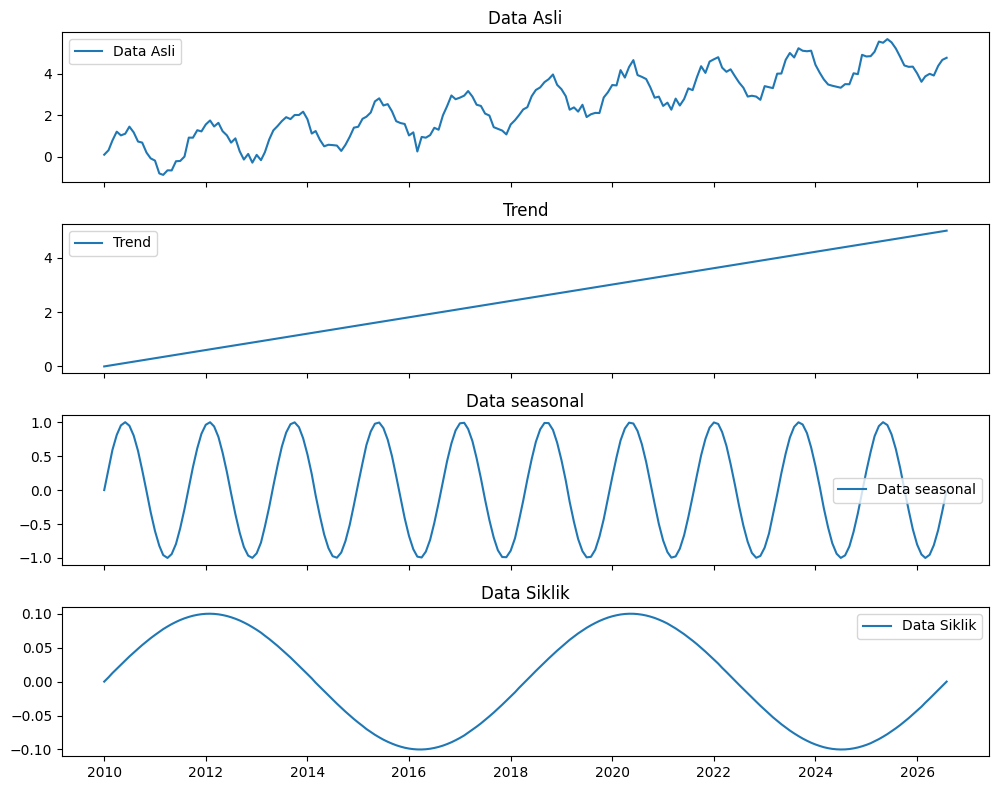

In [9]:
# Visulasasi data
fig, ax = plt.subplots(4,1, figsize=(10,8), sharex= True)

ax[0].plot(df, label="Data Asli")
ax[0].set_title("Data Asli")
ax[0].legend()

ax[1].plot(df.index, trend, label="Trend")
ax[1].set_title("Trend")
ax[1].legend()

ax[2].plot(df.index, seasonality , label="Data seasonal")
ax[2].set_title("Data seasonal")
ax[2].legend()

ax[3].plot(df.index,cyclical, label="Data Siklik")
ax[3].set_title("Data Siklik")
ax[3].legend()

plt.tight_layout()
plt.show()

## Contoh implementasi

In [10]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [21]:
# Data creation
np.random.seed(42)
n_samples=200
ad_cost = np.random.rand(n_samples) * 5000
price = np.random.rand(n_samples) * 100 + 50
sales = ad_cost * 0.4 + price * (-0.8) + 5000 + np.random.normal(0, 500, n_samples)
data = pd.DataFrame({'ad_cost': ad_cost, 'price': price, 'sales': sales})
data

,ad_cost,price,sales
0,1872.700594,114.203165,6310.457110
1,4753.571532,58.413996,6865.199336
2,3659.969709,66.162871,6752.034072
3,2993.292421,139.855419,5930.299255
4,780.093202,110.642906,5385.606132
...,...,...,...
195,1746.047873,143.075733,5168.483505
196,3629.778394,135.841275,6478.466750
197,4485.551300,92.899403,6694.781943
198,4435.432121,125.087107,6554.629140


In [14]:
# Feature Selection and Target definition
X = data[['ad_cost', 'price']]
y = data['sales']

# Scalling feature ( recommended for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.37213971,  0.47099449],
       [ 1.58661523, -1.43784301],
       [ 0.84305607, -1.17271371],
       [ 0.38977043,  1.34869148],
       [-1.11502273,  0.34917953],
       [-1.11510473, -1.69426168],
       [-1.44796149, -1.37854267],
       [ 1.2992203 ,  0.54445495],
       [ 0.39812162, -1.70841126],
       [ 0.76173329, -1.17552162],
       [-1.57544305,  0.15177402],
       [ 1.65187218,  0.64160363],
       [ 1.18454028,  0.50496886],
       [-0.92355633, -0.95838766],
       [-1.02729185,  0.71100582],
       [-1.02192206, -0.9139771 ],
       [-0.61112353, -0.61236802],
       [ 0.13853389,  0.82840564],
       [-0.17698669,  0.49700233],
       [-0.65536272,  1.17990524],
       [ 0.43462599,  0.52430604],
       [-1.17120018,  0.21874963],
       [-0.65225037, -1.40521949],
       [-0.39994247, -0.46758263],
       [-0.09497174, -0.81833439],
       [ 1.02385304, -0.89091415],
       [-0.96661323,  1.60344542],
       [ 0.10276345, -0.38073788],
       [ 0.36854369,

In [18]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Hyperparameter Tuning (Optional)
params = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), params, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_params


{'fit_intercept': True}

In [19]:
# Model Training
model=LinearRegression(**best_params)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 362314.50086969853
R-squared: 0.5389042616191222


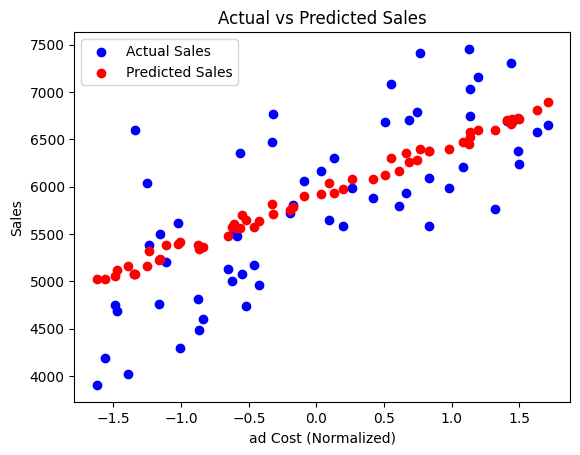

In [20]:
# Visualisasi result
plt.scatter(X_test[:, 0], y_test, label='Actual Sales',color='b')
plt.scatter(X_test[:, 0], y_pred, label='Predicted Sales', color='r')
plt.legend()
plt.xlabel("ad Cost (Normalized)")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.show()